<a href="https://colab.research.google.com/github/EarthPurse/introcomputationalphysics-unt-phys3510-euler-and-solve_ivp-euler-and-solve_ivp/blob/main/HW_9_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

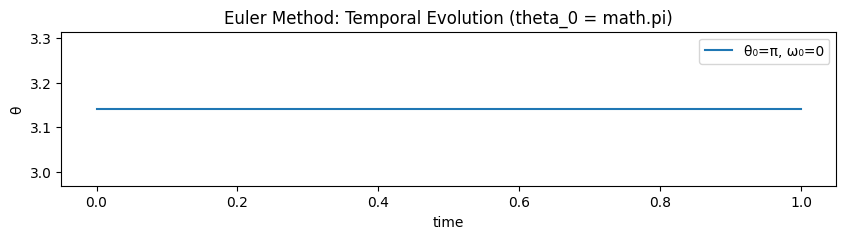

In [18]:
# Define Parameters
  # Initial angle 0
  # Initial angular velocity
  # Time interval
  # Number of steps

# Loop steps
  # Calculate new angle
  # Calculate new angular velocity

# Plot
  # Temporal Evolution
  # Phase Portrait


import numpy as np
import matplotlib.pyplot as plt
import math

def euler_pendulum(theta0, omega0, t_initial=0, t_final=1, n_steps=2):
    dt = (t_final - t_initial) / n_steps
    t = np.linspace(t_initial, t_final, n_steps+1)
    theta = np.zeros(n_steps+1)
    omega = np.zeros(n_steps+1)
    theta[0] = theta0
    omega[0] = omega0

    for i in range(n_steps):
        dtheta_dt = omega[i]
        domega_dt = -np.sin(theta[i])
        theta[i+1] = theta[i] + dtheta_dt * dt
        omega[i+1] = omega[i] + domega_dt * dt
    return t, theta, omega

# Problem 1(2)
t1, theta1, omega1 = euler_pendulum(math.pi, 0)
plt.figure(figsize=(10,2))
plt.plot(t1, theta1, label="θ₀=π, ω₀=0")
plt.xlabel("time")
plt.ylabel("θ")
plt.title("Euler Method: Temporal Evolution (theta_0 = math.pi)")
plt.legend()
plt.show()

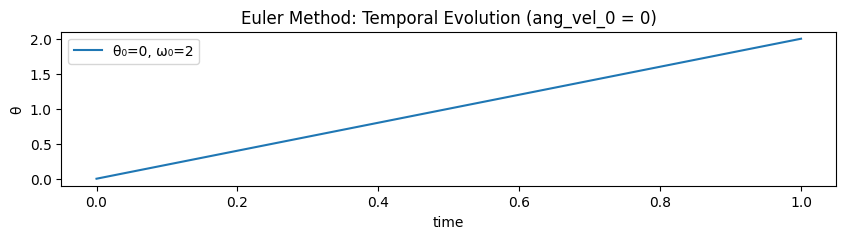

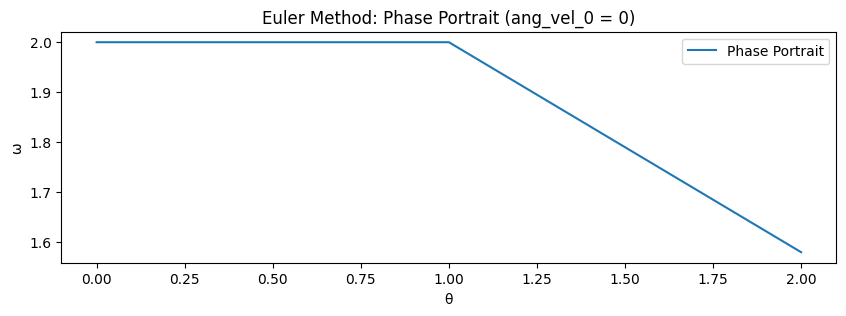

In [19]:
# Problem 1(3)
t2, theta2, omega2 = euler_pendulum(0, 2)

# temporal evolution
plt.figure(figsize=(10,2))
plt.plot(t2, theta2, label="θ₀=0, ω₀=2")
plt.xlabel("time")
plt.ylabel("θ")
plt.title("Euler Method: Temporal Evolution (ang_vel_0 = 0)")
plt.legend()
plt.show()

# phase portrait
plt.figure(figsize=(10,3))
plt.plot(theta2, omega2, label="Phase Portrait")
plt.xlabel("θ")
plt.ylabel("ω")
plt.title("Euler Method: Phase Portrait (ang_vel_0 = 0)")
plt.legend()
plt.show()

# Mesh density would cause decently big errors cuasing unstable solutions
# Euleres method had innacurate trajectories
  # In the long run energys is better conserved


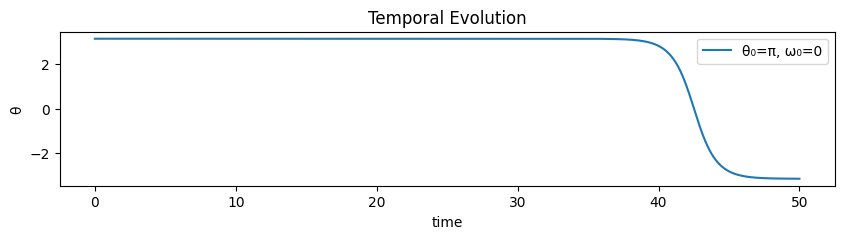

In [25]:
# Use scipy.integrate and solve_ivp to solve problem

# Define functions
  # Input: t, y = 0, ω

# Input Parameters
  # time = t_intial and t_final


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math

# define ODE for rigid pendulum
def pendulum_ode(t, y, omega0=1):
    theta, omega = y
    return [omega, -omega0**2 * np.sin(theta)]

# time span and mesh
t_initial = 0
t_final = 50
t_span = (t_initial, t_final)
t_eval = np.linspace(t_initial, t_final, 5000)

# Case 1: theta0 = pi, omega0 = 0
sol1 = solve_ivp(pendulum_ode, t_span, [math.pi, 0],
                 t_eval=t_eval, method="RK45", rtol=1e-6, atol=1e-9)

# plot temporal evolution
plt.figure(figsize=(10,2))
plt.plot(sol1.t, sol1.y[0], label="θ₀=π, ω₀=0")
plt.xlabel("time")
plt.ylabel("θ")
plt.title("Temporal Evolution")
plt.legend()
plt.show()

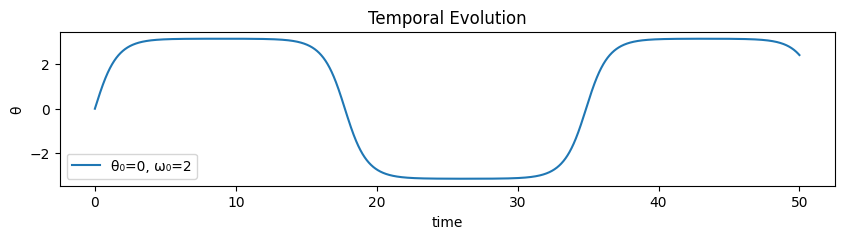

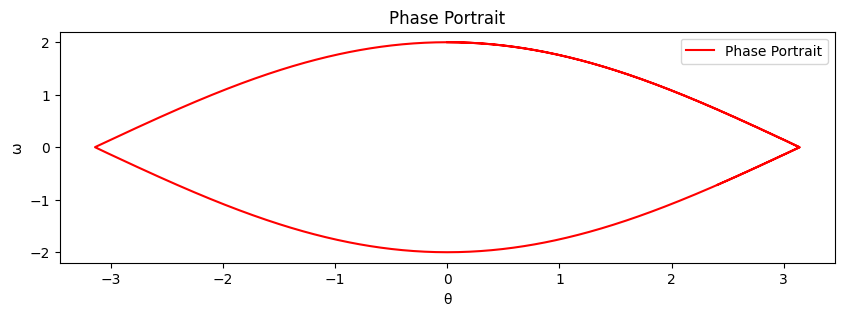

In [22]:
# Problem 2 (3): theta0 = 0, omega0 = 2
sol2 = solve_ivp(pendulum_ode, t_span, [0, 2],
                 t_eval=t_eval, method="RK45", rtol=1e-6, atol=1e-9)

# temporal evolution
plt.figure(figsize=(10,2))
plt.plot(sol2.t, sol2.y[0], label="θ₀=0, ω₀=2")
plt.xlabel("time")
plt.ylabel("θ")
plt.title("Temporal Evolution")
plt.legend()
plt.show()

# phase portrait
plt.figure(figsize=(10,3))
plt.plot(sol2.y[0], sol2.y[1], "r", label="Phase Portrait")
plt.xlabel("θ")
plt.ylabel("ω")
plt.title("Phase Portrait")
plt.legend()
plt.show()



In [29]:
# define Euler method for rigid pendulum
def euler_pendulum(theta0, omega0, t0, tf, n_steps):
    """
    Solves the pendulum equation θ'' = -sin(θ) using semi-implicit Euler.
    Returns arrays for time, θ, and ω.
    """
    dt = (tf - t0) / n_steps  # time step size
    t = [t0]                  # time list
    theta = [theta0]          # angle list
    omega = [omega0]          # angular velocity list

    for _ in range(n_steps):
        # semi-implicit Euler update
        omega_new = omega[-1] - np.sin(theta[-1]) * dt  # velocity is updated
        theta_new = theta[-1] + omega_new * dt          # angle is updated
        t_new = t[-1] + dt                              # time is updated

        # append to lists
        omega.append(omega_new)
        theta.append(theta_new)
        t.append(t_new)

    return np.array(t), np.array(theta), np.array(omega)


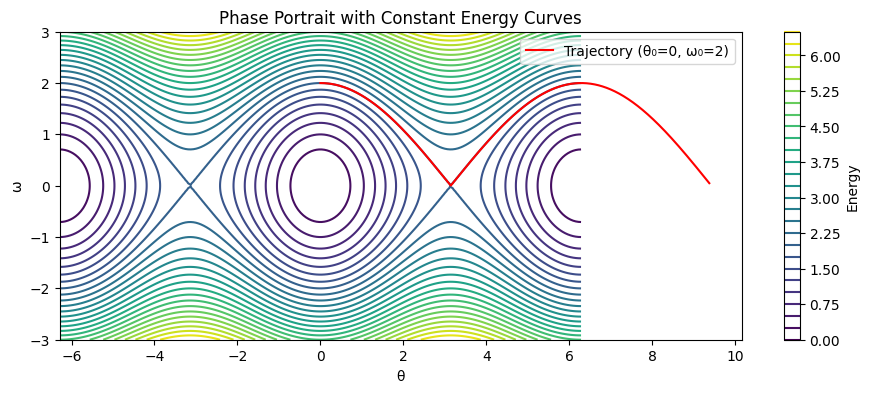

In [30]:
# define total energy function
def pendulum_energy(theta, omega):
    return 0.5 * omega**2 + (1 - np.cos(theta))

# generate grid for contours
theta_grid = np.linspace(-2*np.pi, 2*np.pi, 200)
omega_grid = np.linspace(-3, 3, 200)
T, W = np.meshgrid(theta_grid, omega_grid)
E = pendulum_energy(T, W)

# solve trajectory with Euler (theta0=0, omega0=2)
t_traj, theta_traj, omega_traj = euler_pendulum(0, 2, 0, 20, 5000)

# plot energy contours
plt.figure(figsize=(11,4))
contours = plt.contour(T, W, E, levels=30, cmap="viridis")
plt.colorbar(contours, label="Energy")

# overlay trajectory
plt.plot(theta_traj, omega_traj, "r", label="Trajectory (θ₀=0, ω₀=2)")

plt.xlabel("θ")
plt.ylabel("ω")
plt.title("Phase Portrait with Constant Energy Curves")
plt.legend()
plt.show()

# Kinetic plus potential energy is represenetd by the lines
# The red line is an approximation using Eulers method
# Energy is slwoly dfrifting since energy is not conserved
# Using solve_ivp gives more accurate perservation of the enrgy produced by the pendulum